# Reserach data 
### Additional Dataset Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Import Data

In [1]:
import pandas as pd

bank_data = pd.read_csv("Data/bank-additional/bank-additional/bank-additional.csv", delimiter=";") #all examples 100%

display(bank_data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### Data Prep

In [2]:
# Preprocessing

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# PP target
bank_target = bank_data['y']
bank_preprocessed = bank_data.drop(columns='y')

label_encoder = preprocessing.LabelEncoder()
bank_target = label_encoder.fit_transform(bank_target) # encoded in 0 / 1


# preprocessor = preprocessing.OneHotEncoder()
estimator = KNeighborsClassifier(n_neighbors=4)
preprocessor = ColumnTransformer(
    transformers=[
        # OneHot 
        ('scaler', preprocessing.MinMaxScaler(), ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',  'euribor3m', 'nr.employed']),
        # use OneHotEncoder
        ('encoder', preprocessing.OneHotEncoder(), ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']) ])

bank_encoded = pd.DataFrame(preprocessor.fit_transform(bank_preprocessed))

pipeline = Pipeline([('preprocessing', preprocessor), ('classification', estimator)])

bank_encoded


,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.171429,0.029412,1.0,0.000000,0.333333,0.269680,0.192469,0.153741,0.512287,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.300000,0.088235,1.0,0.000000,0.937500,0.698753,0.602510,0.956916,0.859735,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.100000,0.000000,1.0,0.000000,1.000000,0.882307,0.376569,0.981179,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.285714,0.058824,1.0,0.000000,1.000000,0.882307,0.376569,0.980499,1.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.414286,0.000000,1.0,0.000000,0.687500,0.389322,0.368201,0.806349,0.877883,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.171429,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980272,1.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4115,0.300000,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980499,1.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4116,0.128571,0.029412,1.0,0.166667,0.333333,0.269680,0.192469,0.163039,0.512287,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4117,0.571429,0.000000,1.0,0.000000,1.000000,0.484412,0.615063,0.982086,1.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### First Trys

c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


For KNN with n = 1 Average Accuracy = 85.04488224316728% , Best Accuarcy = 87.13592233009709
For KNN with n = 1 Average Precision = 28.36761300714789% , Best Precision = 38.88888888888889
For KNN with n = 1 Average Recall = 25.033816425120776% , Best Recall = 35.55555555555556
For KNN with n = 2 Average Accuracy = 89.39066449342121% , Best Accuarcy = 90.53398058252428
For KNN with n = 2 Average Precision = 57.41666666666667% , Best Precision = 83.33333333333334
For KNN with n = 2 Average Recall = 11.97584541062802% , Best Recall = 20.0
For KNN with n = 3 Average Accuracy = 88.73514752084664% , Best Accuarcy = 90.0485436893204
For KNN with n = 3 Average Precision = 46.446115288220554% , Best Precision = 61.904761904761905
For KNN with n = 3 Average Recall = 20.159420289855074% , Best Recall = 28.26086956521739
For KNN with n = 4 Average Accuracy = 89.70619847400376% , Best Accuarcy = 90.53398058252428
For KNN with n = 4 Average Precision = 65.64935064935065% , Best Precision = 80.0
For 

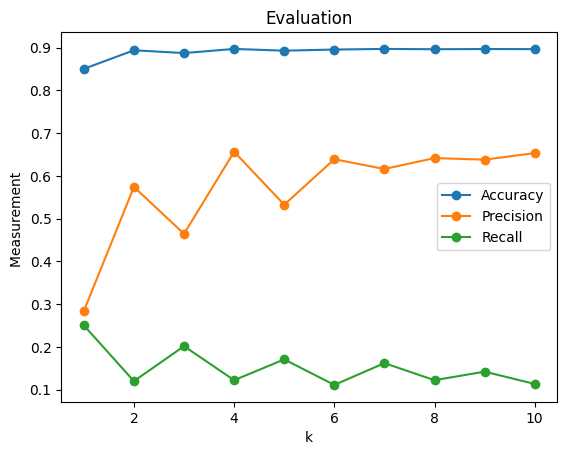

In [3]:
#General approach with Model evaluation.. Recall or Precision?
#F1 & accuracy always, we can include a cost example for r & p
#r: how many potential customers to I miss (which were actually using the account)
#p: What percentage of the selected customers actually use an account like that

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

k_l = []
for i in range(10):
    k_l.append(i+1)

accuracy_scores = []
recall_scores = []
precision_scores = []

for k in k_l:
    estimator = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(estimator, bank_encoded, bank_target, cv=10, scoring='accuracy')
    print("For KNN with n = {} Average Accuracy = {}% , Best Accuarcy = {}".format(k, accuracy.mean() * 100.0, accuracy.max() * 100.0))
    accuracy_scores.append(accuracy.mean())

    precision = cross_val_score(estimator, bank_encoded, bank_target, cv=10, scoring='precision')
    print("For KNN with n = {} Average Precision = {}% , Best Precision = {}".format(k, precision.mean() * 100.0, precision.max() * 100.0))
    precision_scores.append(precision.mean())

    recall = cross_val_score(estimator, bank_encoded, bank_target, cv=10, scoring='recall')
    print("For KNN with n = {} Average Recall = {}% , Best Recall = {}".format(k, recall.mean() * 100.0, recall.max() * 100.0))
    recall_scores.append(recall.mean())

plt.plot(k_l, accuracy_scores, marker='o', label="Accuracy")
plt.plot(k_l, precision_scores, marker='o', label="Precision")
plt.plot(k_l, recall_scores, marker='o', label="Recall")
plt.xlabel('k')
plt.ylabel('Measurement ')
plt.title('Evaluation')
plt.legend()
plt.show()

### Try Decision Trees

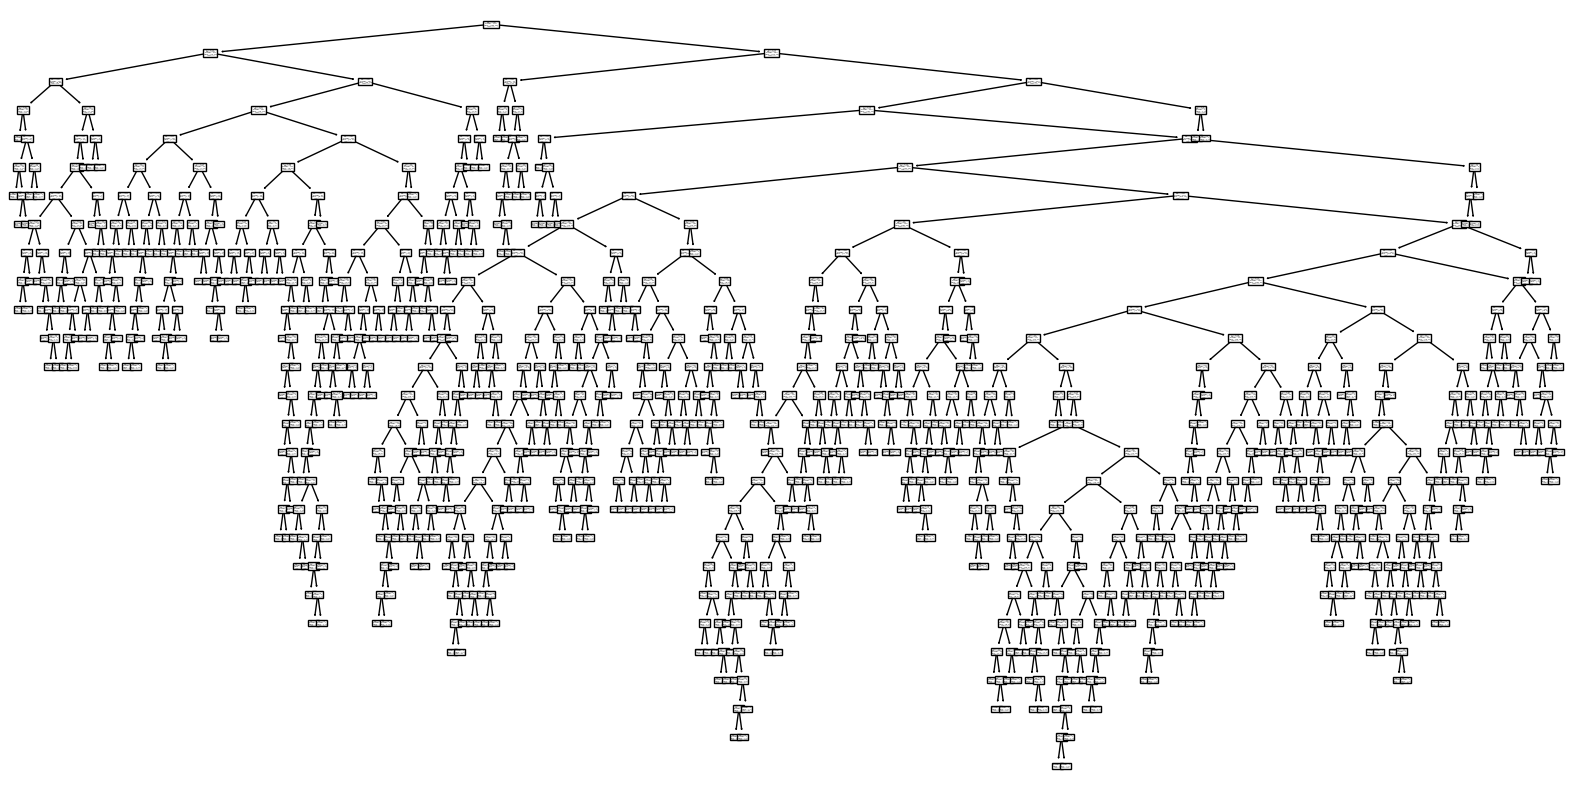

Average Accuracy = 83.78256915408781% , Best Accuarcy = 84.9514563106796
Average Precision = 29.262488236177518% , Best Precision = 36.53846153846153
Average Recall = 31.922705314009658% , Best Recall = 42.22222222222222


In [4]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(bank_encoded, bank_target)

plt.figure(figsize=(20,10))
tree.plot_tree(dt,
               feature_names=bank_encoded.columns,
               class_names=label_encoder.classes_)
plt.show()

dt = DecisionTreeClassifier()
accuracy = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='accuracy')
print("Average Accuracy = {}% , Best Accuarcy = {}".format(accuracy.mean() * 100.0, accuracy.max() * 100.0))

precision = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='precision')
print("Average Precision = {}% , Best Precision = {}".format(precision.mean() * 100.0, precision.max() * 100.0))

recall = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='recall')
print("Average Recall = {}% , Best Recall = {}".format(recall.mean() * 100.0, recall.max() * 100.0))



DT with Depth 3


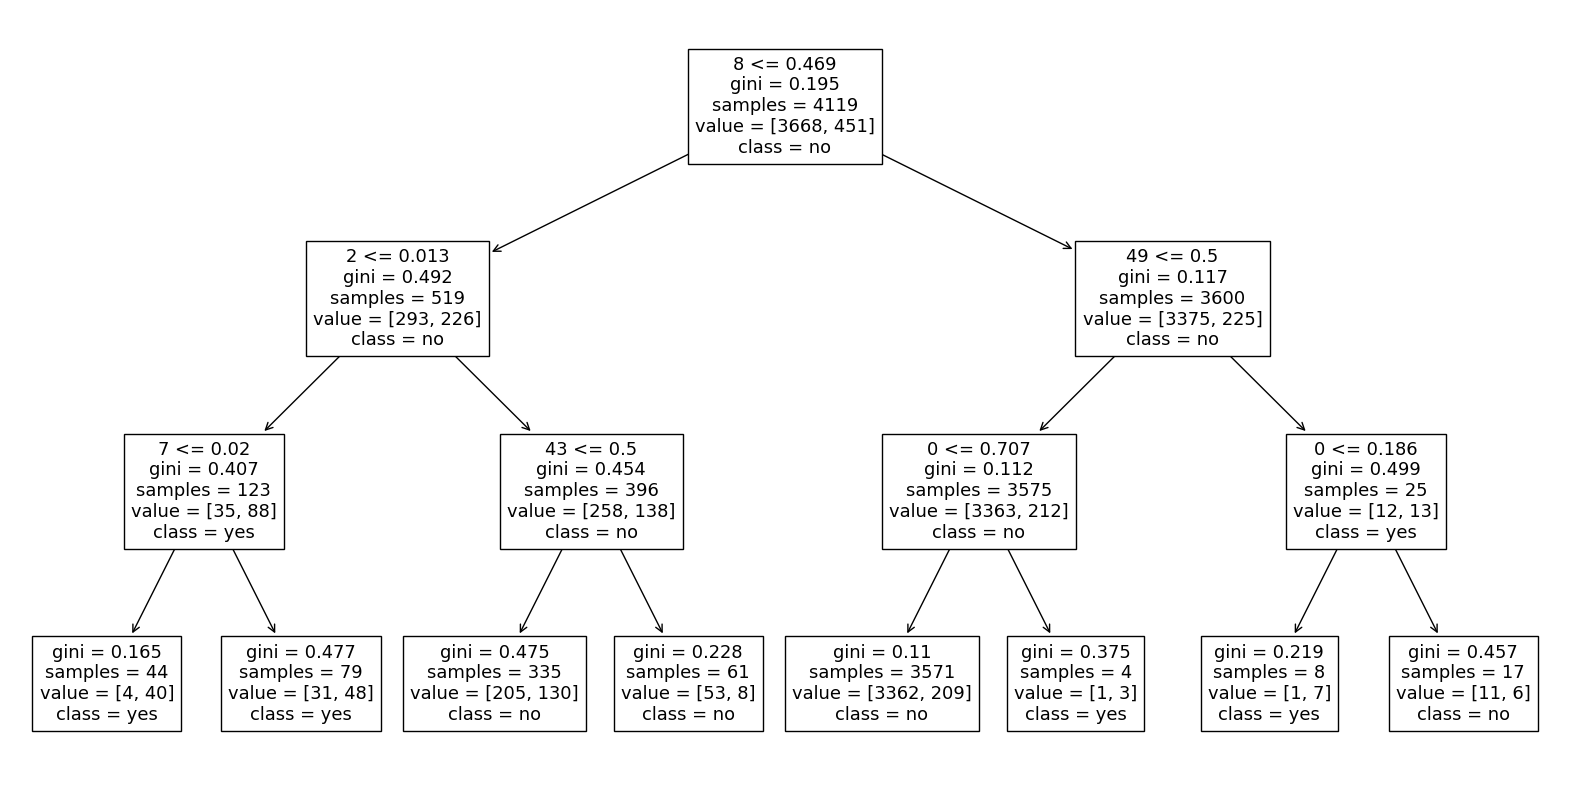

Average Accuracy = 90.38604634682163% , Best Accuarcy = 92.47572815533981
Average Precision = 70.76190476190476% , Best Precision = 93.75
Average Recall = 20.40096618357488% , Best Recall = 33.33333333333333

DT with Depth 4


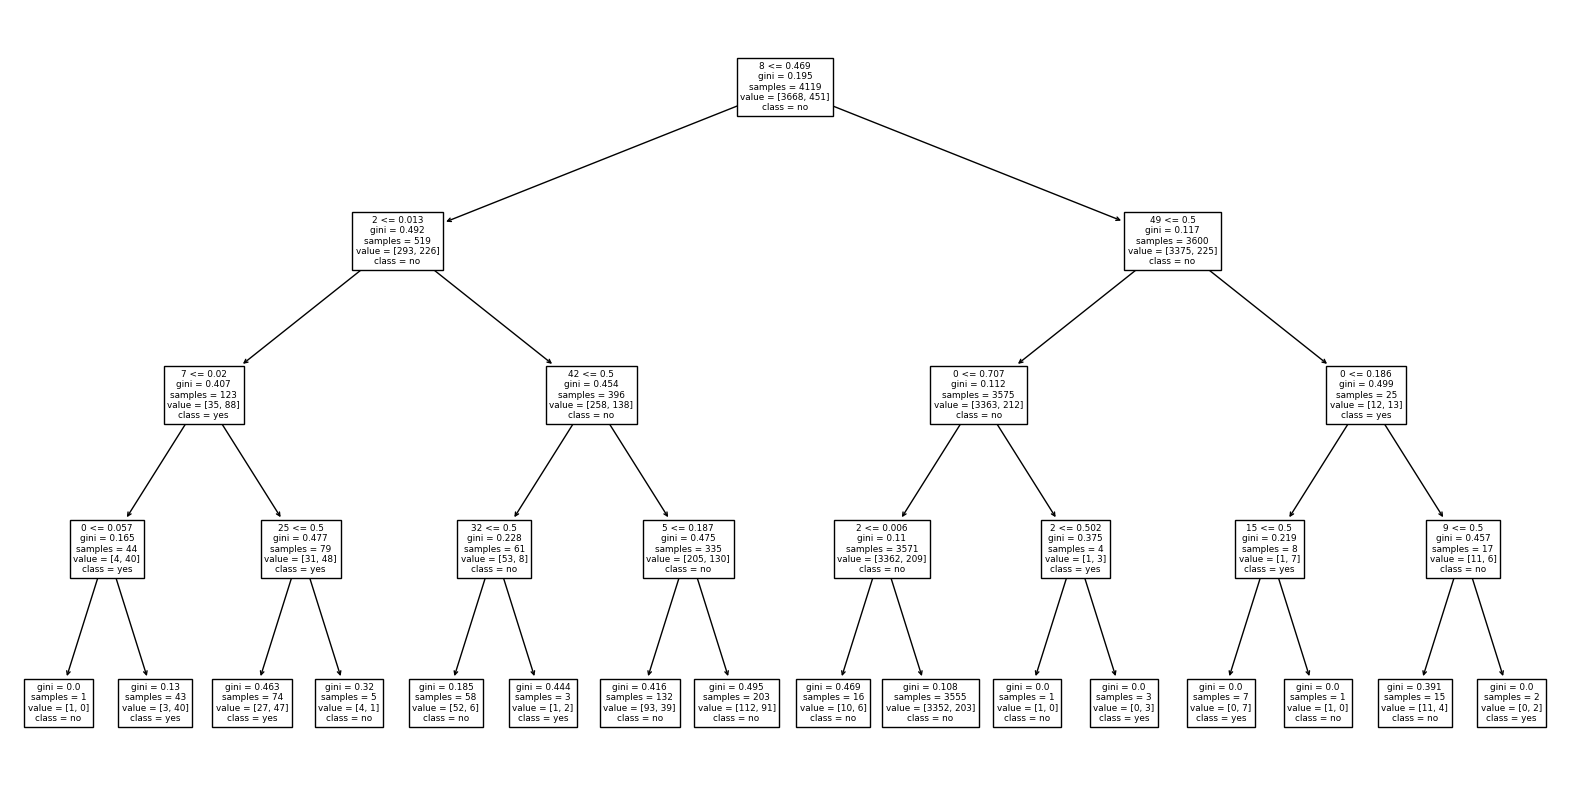

Average Accuracy = 90.26468712352064% , Best Accuarcy = 92.23300970873787
Average Precision = 70.0521978021978% , Best Precision = 87.5
Average Recall = 20.17874396135266% , Best Recall = 31.11111111111111

DT with Depth 5


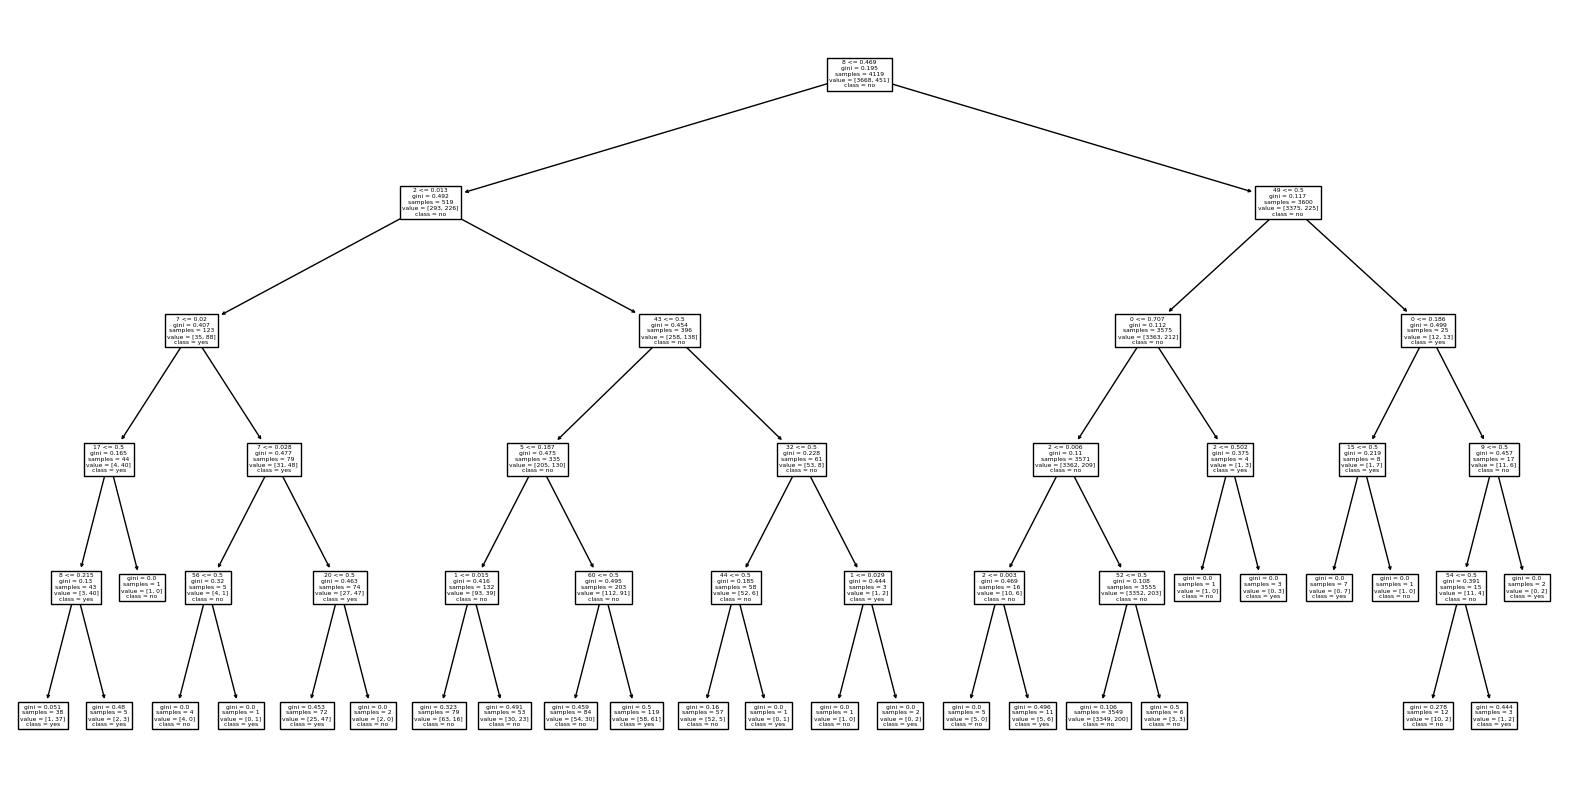

Average Accuracy = 89.5850164174521% , Best Accuarcy = 91.01941747572816
Average Precision = 56.25590650053125% , Best Precision = 71.42857142857143
Average Recall = 24.632850241545896% , Best Recall = 37.77777777777778

DT with Depth 6


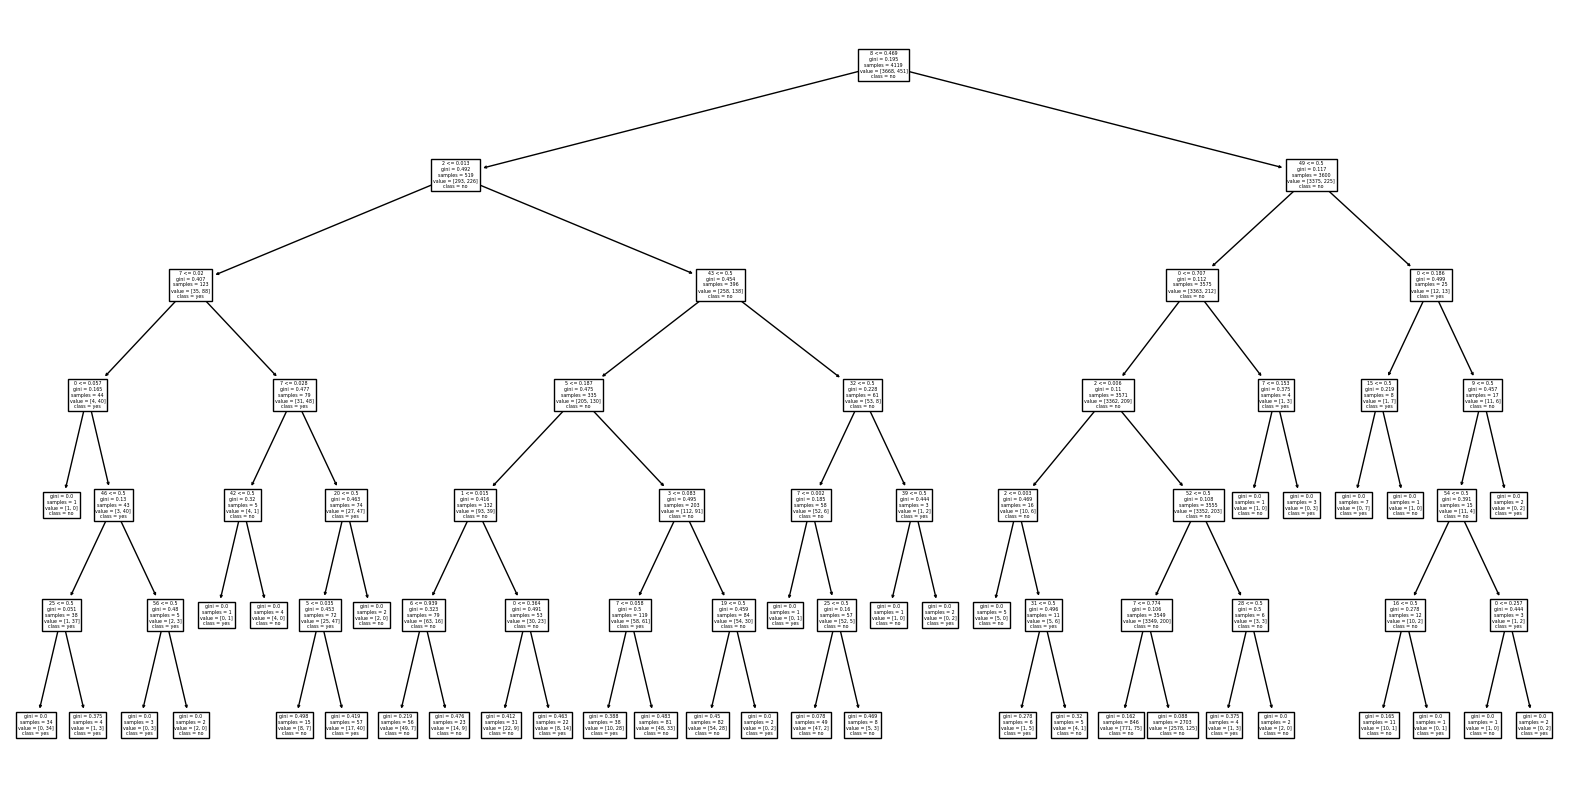

Average Accuracy = 89.2934590036142% , Best Accuarcy = 90.53398058252428
Average Precision = 52.47086407352734% , Best Precision = 66.66666666666666
Average Recall = 28.35748792270531% , Best Recall = 39.130434782608695

DT with Depth 7


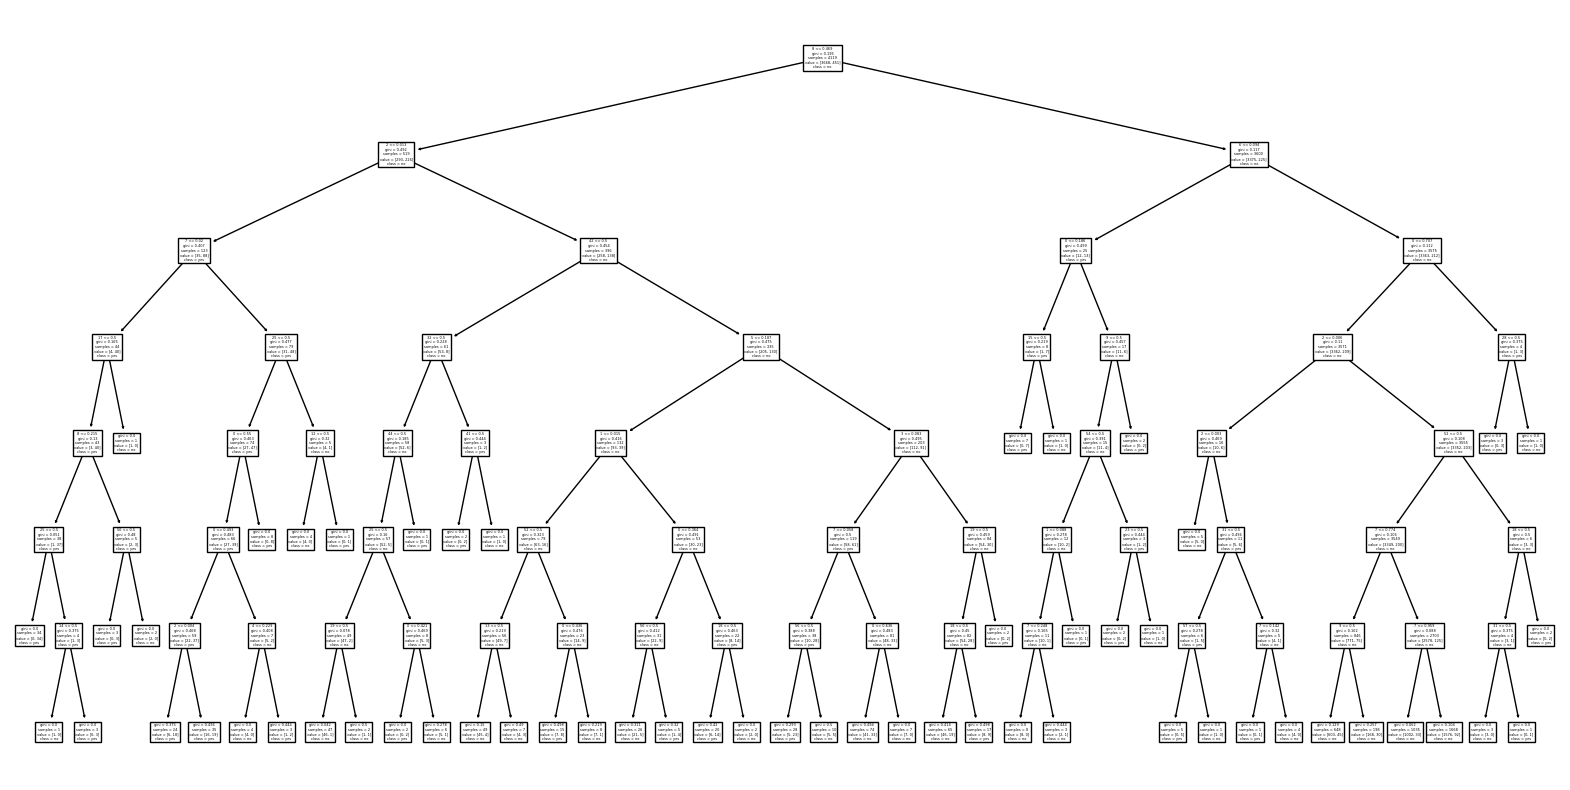

Average Accuracy = 89.53617745021616% , Best Accuarcy = 90.77669902912622
Average Precision = 54.985541582600405% , Best Precision = 65.38461538461539
Average Recall = 25.057971014492754% , Best Recall = 35.55555555555556


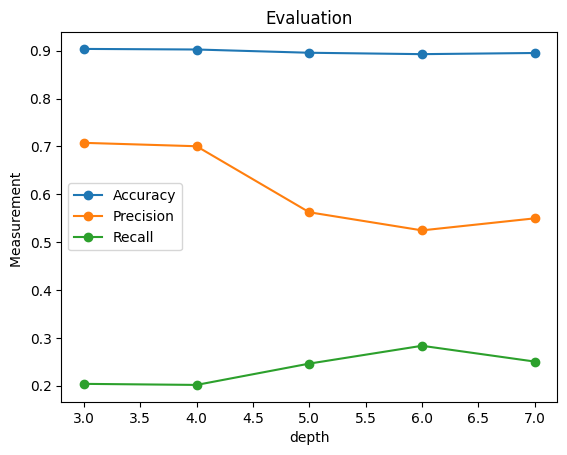

In [5]:
i_l = []
for i in range(5):
    i_l.append(i+3)

accuracy_scores = []
recall_scores = []
precision_scores = []

for i in i_l:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(bank_encoded, bank_target)

    print("")
    print("DT with Depth " + str(i))

    plt.figure(figsize=(20,10))
    tree.plot_tree(dt,
                feature_names=bank_encoded.columns,
                class_names=label_encoder.classes_)
    plt.show()

    dt = DecisionTreeClassifier(max_depth=i)
    accuracy = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='accuracy')
    print("Average Accuracy = {}% , Best Accuarcy = {}".format(accuracy.mean() * 100.0, accuracy.max() * 100.0))
    accuracy_scores.append(accuracy.mean())

    precision = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='precision')
    print("Average Precision = {}% , Best Precision = {}".format(precision.mean() * 100.0, precision.max() * 100.0))
    precision_scores.append(precision.mean())

    recall = cross_val_score(dt, bank_encoded, bank_target, cv=10, scoring='recall')
    print("Average Recall = {}% , Best Recall = {}".format(recall.mean() * 100.0, recall.max() * 100.0))
    recall_scores.append(recall.mean())

plt.plot(i_l, accuracy_scores, marker='o', label="Accuracy")
plt.plot(i_l, precision_scores, marker='o', label="Precision")
plt.plot(i_l, recall_scores, marker='o', label="Recall")
plt.xlabel('depth')
plt.ylabel('Measurement ')
plt.title('Evaluation')
plt.legend()
plt.show()


### Try a neural network


Neural Net with Max Iter 100


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and 

Average Accuracy = 89.2938133371129% , Best Accuarcy = 90.51094890510949


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and 

Average Precision = 52.26281613123718% , Best Precision = 61.904761904761905


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and 

Average Recall = 25.710144927536234% , Best Recall = 37.77777777777778

Neural Net with Max Iter 200


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

Average Accuracy = 88.10449294876337% , Best Accuarcy = 90.51094890510949


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

Average Precision = 43.25449669948235% , Best Precision = 58.333333333333336


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

Average Recall = 28.15942028985507% , Best Recall = 46.666666666666664

Neural Net with Max Iter 350


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and 

Average Accuracy = 87.44856258710699% , Best Accuarcy = 90.0485436893204


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and 

Average Precision = 40.385508003210944% , Best Precision = 57.692307692307686


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and 

Average Recall = 29.483091787439612% , Best Recall = 37.77777777777778

Neural Net with Max Iter 500


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and 

Average Accuracy = 86.7929865589493% , Best Accuarcy = 89.80582524271846


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and 

Average Precision = 37.511128018025296% , Best Precision = 54.83870967741935


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and 

Average Recall = 29.932367149758456% , Best Recall = 37.77777777777778

Neural Net with Max Iter 1000
Average Accuracy = 86.89007393759006% , Best Accuarcy = 89.32038834951457
Average Precision = 37.589403779058955% , Best Precision = 51.85185185185185
Average Recall = 29.053140096618357% , Best Recall = 37.77777777777778


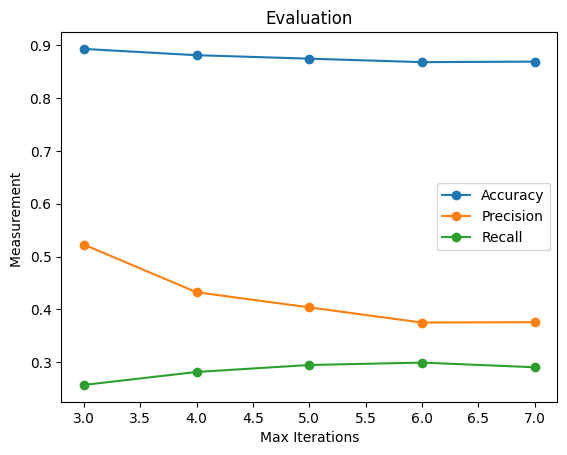

In [6]:
from sklearn.neural_network import MLPClassifier 

accuracy_scores = []
recall_scores = []
precision_scores = []

for i in [100, 200, 350, 500, 1000]:
    print("")
    print("Neural Net with Max Iter " + str(i))

    neuralnet = MLPClassifier(max_iter=i, random_state=42)

    accuracy = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='accuracy')
    print("Average Accuracy = {}% , Best Accuarcy = {}".format(accuracy.mean() * 100.0, accuracy.max() * 100.0))
    accuracy_scores.append(accuracy.mean())

    precision = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='precision')
    print("Average Precision = {}% , Best Precision = {}".format(precision.mean() * 100.0, precision.max() * 100.0))
    precision_scores.append(precision.mean())

    recall = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='recall')
    print("Average Recall = {}% , Best Recall = {}".format(recall.mean() * 100.0, recall.max() * 100.0))
    recall_scores.append(recall.mean())

plt.plot(i_l, accuracy_scores, marker='o', label="Accuracy")
plt.plot(i_l, precision_scores, marker='o', label="Precision")
plt.plot(i_l, recall_scores, marker='o', label="Recall")
plt.xlabel('Max Iterations')
plt.ylabel('Measurement ')
plt.title('Evaluation')
plt.legend()
plt.show()


#### Neural Net with big dataset

In [7]:
# import big dataset and preprocess

bank_data = pd.read_csv("Data/bank-additional/bank-additional/bank-additional-full.csv", delimiter=";") #all examples 100%

# PP target
bank_target = bank_data['y']
bank_preprocessed = bank_data.drop(columns='y')

label_encoder = preprocessing.LabelEncoder()
bank_target = label_encoder.fit_transform(bank_target) # encoded in 0 / 1

estimator = KNeighborsClassifier(n_neighbors=4)
preprocessor = ColumnTransformer(
    transformers=[
        # OneHot 
        ('scaler', preprocessing.MinMaxScaler(), ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',  'euribor3m', 'nr.employed']),
        # use OneHotEncoder
        ('encoder', preprocessing.OneHotEncoder(), ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']) ])

bank_encoded = pd.DataFrame(preprocessor.fit_transform(bank_preprocessed))

bank_encoded

neuralnet = MLPClassifier(max_iter=200, random_state=42)

accuracy = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='accuracy')
print("Average Accuracy = {}% , Best Accuarcy = {}".format(accuracy.mean() * 100.0, accuracy.max() * 100.0))
accuracy_scores.append(accuracy.mean())

precision = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='precision')
print("Average Precision = {}% , Best Precision = {}".format(precision.mean() * 100.0, precision.max() * 100.0))
precision_scores.append(precision.mean())

recall = cross_val_score(neuralnet, bank_encoded, bank_target, cv=10, scoring='recall')
print("Average Recall = {}% , Best Recall = {}".format(recall.mean() * 100.0, recall.max() * 100.0))
recall_scores.append(recall.mean())

c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

Average Accuracy = 63.38410611175236% , Best Accuarcy = 88.73512988589464


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarnin

Average Precision = 4.495336168486454% , Best Precision = 18.75


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

Average Recall = 12.068965517241379% , Best Recall = 99.56896551724138


c:\Users\I568830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
